Read data

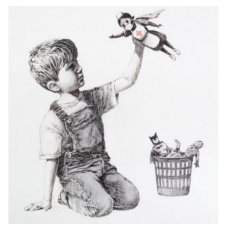

<Figure size 6750x5250 with 0 Axes>

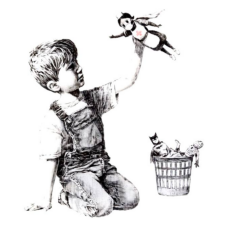

<Figure size 6750x5250 with 0 Axes>

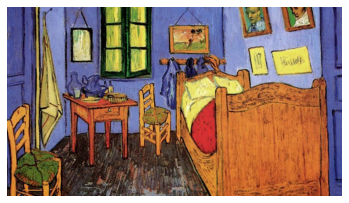

<Figure size 6750x5250 with 0 Axes>

In [32]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def show(img):
    plt.imshow(img)
    plt.axis('off')
    plt.figure(figsize=(45, 35), dpi=150)
    plt.show()

def read(path):
    return cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)

img1 = read('C:/Users/khrys/Desktop/cv/lab2/img1.jpg')
show(img1)

img2 = read('C:/Users/khrys/Desktop/cv/lab2/img2.jpg')
show(img2)

img3 = read('C:/Users/khrys/Desktop/cv/lab2/img4.jpg')
show(img3)

Warped image function

In [49]:
def affine(img):
    img = cv.warpAffine(img, np.array([[1, -0.3, 0], [0, 1, 0]]), img1.shape[:2][::-1])
    return img

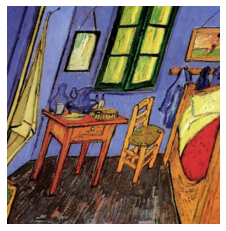

<Figure size 6750x5250 with 0 Axes>

In [50]:
img4 = affine(img3)
show(img4)

Rotate image function

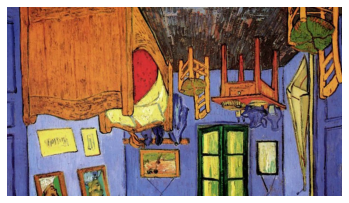

<Figure size 6750x5250 with 0 Axes>

In [35]:
rot_1 = cv.rotate(img3, cv.ROTATE_180)
show(rot_1)

Length between 2 point

In [36]:
def dist(x, y):
  n = len(x)
  assert len(x) == len(y)
  return float(sum([(x[i] ^ y[i]) for i in range(n)]))

Custom matching

In [51]:
def custom_match(img, second):
    orb = cv.ORB_create()

    kp1, des1 = orb.detectAndCompute(img, None)
    kp2, des2 = orb.detectAndCompute(second, None)
    
    matches = []
    for i, k1 in enumerate(des1):
      for j, k2 in enumerate(des2):
        matches.append(cv.DMatch(_distance=dist(k1,k2), _imgIdx=0, _queryIdx=i, _trainIdx=j))

    matches = sorted(matches, key = lambda x : x.distance)

    img3 = cv.drawMatches(img, kp1, second, kp2, matches[:10], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    show(img3)

OpenCV matching

In [52]:
def orb_match(img,second):
    orb = cv.ORB_create()

    kp1, des1 = orb.detectAndCompute(img, None)
    kp2, des2 = orb.detectAndCompute(second, None)

    matches = sorted(
        cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True).match(des1,des2),
        key = lambda x:x.distance)

    img4 = cv.drawMatches(img, kp1, second, kp2, matches[:10], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    show(img4)

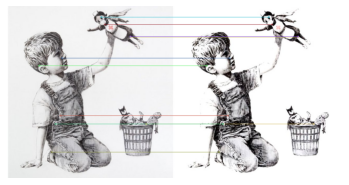

<Figure size 6750x5250 with 0 Axes>

In [53]:
custom_match(img1,img2)

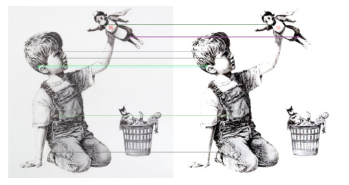

<Figure size 6750x5250 with 0 Axes>

In [54]:
orb_match(img1,img2)

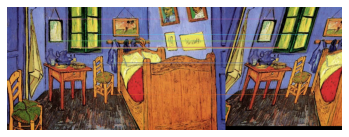

<Figure size 6750x5250 with 0 Axes>

In [41]:
custom_match(img3, img4)


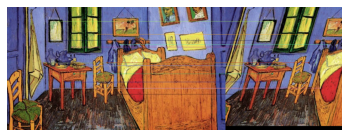

<Figure size 6750x5250 with 0 Axes>

In [42]:
orb_match(img3, img4)

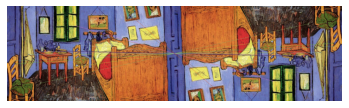

<Figure size 6750x5250 with 0 Axes>

In [43]:
custom_match(img3, rot_1)

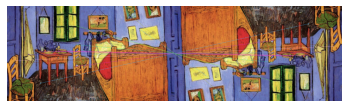

<Figure size 6750x5250 with 0 Axes>

In [44]:
orb_match(img3, rot_1)